Sai Sandeep Mandava, Shravan Appala, Rashmi Goli

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [46]:
btc_data = pd.read_csv("BTC-USD.csv")
btc_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [47]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3368 entries, 0 to 3367
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3368 non-null   object 
 1   Open       3368 non-null   float64
 2   High       3368 non-null   float64
 3   Low        3368 non-null   float64
 4   Close      3368 non-null   float64
 5   Adj Close  3368 non-null   float64
 6   Volume     3368 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 184.3+ KB


In [48]:
btc_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3368.000000,3368.000000,3368.000000,3368.000000,3368.000000,3.368000e+03
mean,14361.797650,14700.327073,13998.237612,14373.307442,14373.307442,1.650865e+10
std,16060.914279,16451.425762,15624.696917,16064.063043,16064.063043,1.914485e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,902.428757,916.842514,885.835770,902.671249,902.671249,1.513962e+08
50%,8198.461914,8317.527832,7965.949463,8202.903808,8202.903808,1.108929e+10
75%,23246.006348,23745.488770,22865.606445,23270.546875,23270.546875,2.691100e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [49]:
btc_data['Date'] = pd.to_datetime(btc_data['Date'])

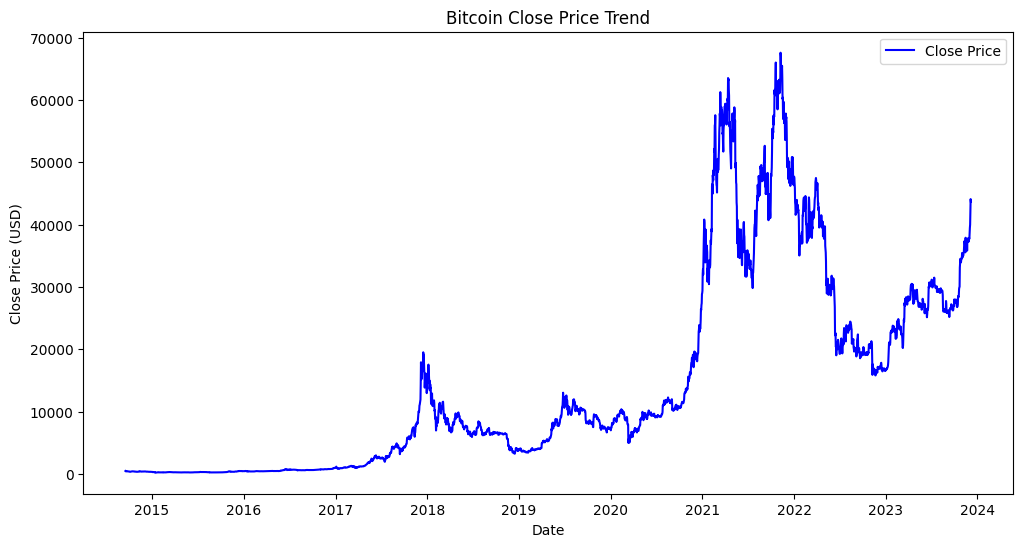

In [50]:
# 1. Trend Analysis - Line chart of Close prices over Date
plt.figure(figsize=(12, 6))
plt.plot(btc_data['Date'], btc_data['Close'], label='Close Price', color='blue')
plt.title('Bitcoin Close Price Trend')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

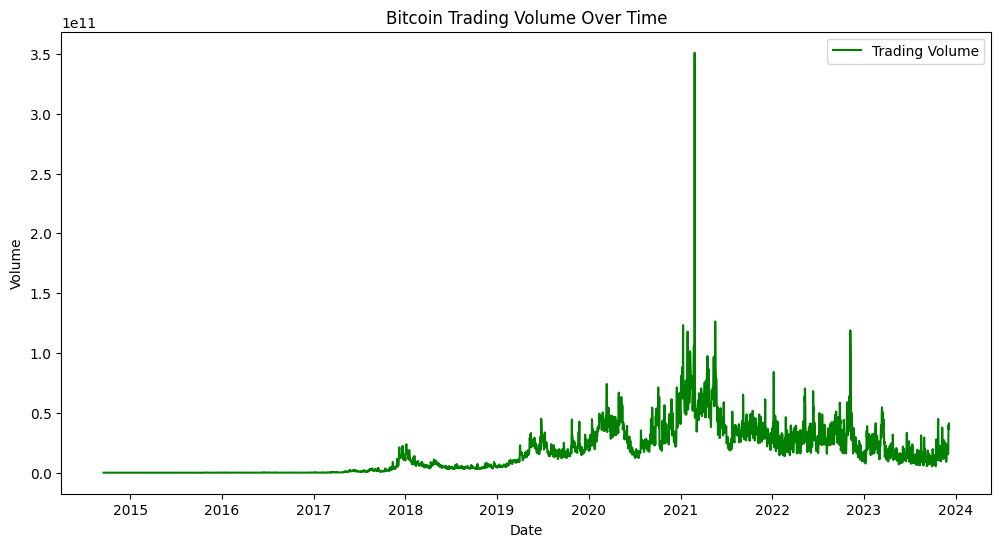

In [51]:
# 2. Volume Analysis - Line chart of Volume over Date
plt.figure(figsize=(12, 6))
plt.plot(btc_data['Date'], btc_data['Volume'], label='Trading Volume', color='green')
plt.title('Bitcoin Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

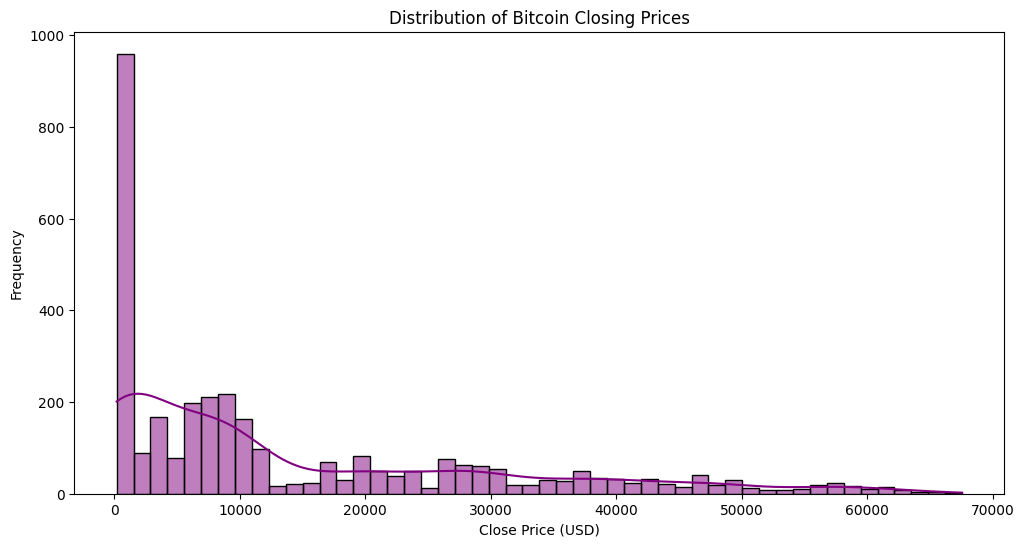

In [52]:
# 3. Price Distribution - Histogram of Close prices
plt.figure(figsize=(12, 6))
sns.histplot(btc_data['Close'], bins=50, kde=True, color='purple')
plt.title('Distribution of Bitcoin Closing Prices')
plt.xlabel('Close Price (USD)')
plt.ylabel('Frequency')
plt.show()

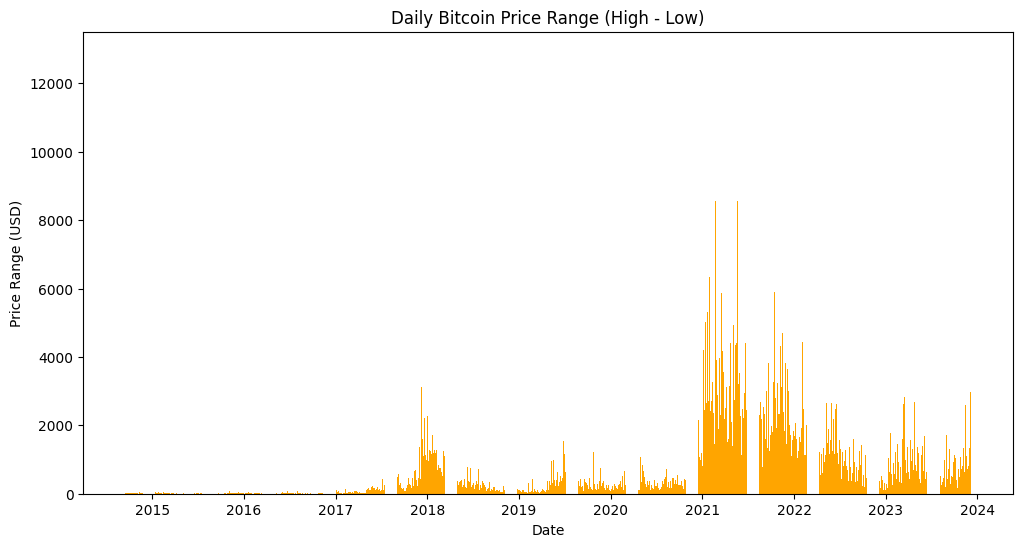

In [53]:
# 4. Volatility Analysis - Bar chart of daily price range
btc_data['Price Range'] = btc_data['High'] - btc_data['Low']
plt.figure(figsize=(12, 6))
plt.bar(btc_data['Date'], btc_data['Price Range'], color='orange')
plt.title('Daily Bitcoin Price Range (High - Low)')
plt.xlabel('Date')
plt.ylabel('Price Range (USD)')
plt.show()

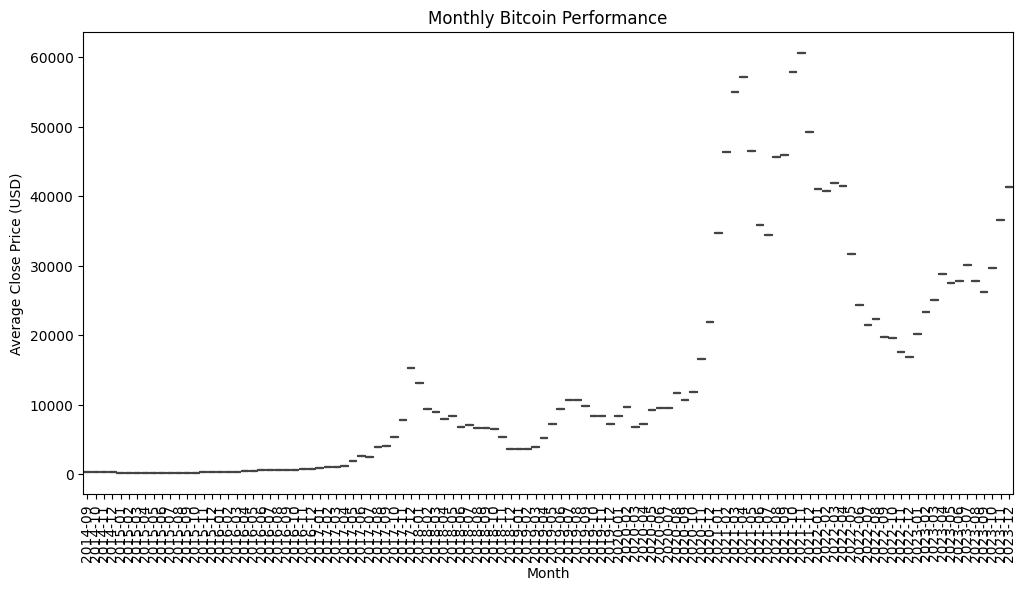

In [54]:
# 5. Monthly Performance - Box plot of monthly Close prices
btc_data['Month'] = btc_data['Date'].dt.to_period('M')
monthly_data = btc_data.groupby('Month')['Close'].agg([np.mean, np.std, np.min, np.max])

plt.figure(figsize=(12, 6))
sns.boxplot(x=monthly_data.index.astype(str), y=monthly_data['mean'])
plt.xticks(rotation=90)
plt.title('Monthly Bitcoin Performance')
plt.xlabel('Month')
plt.ylabel('Average Close Price (USD)')
plt.show()

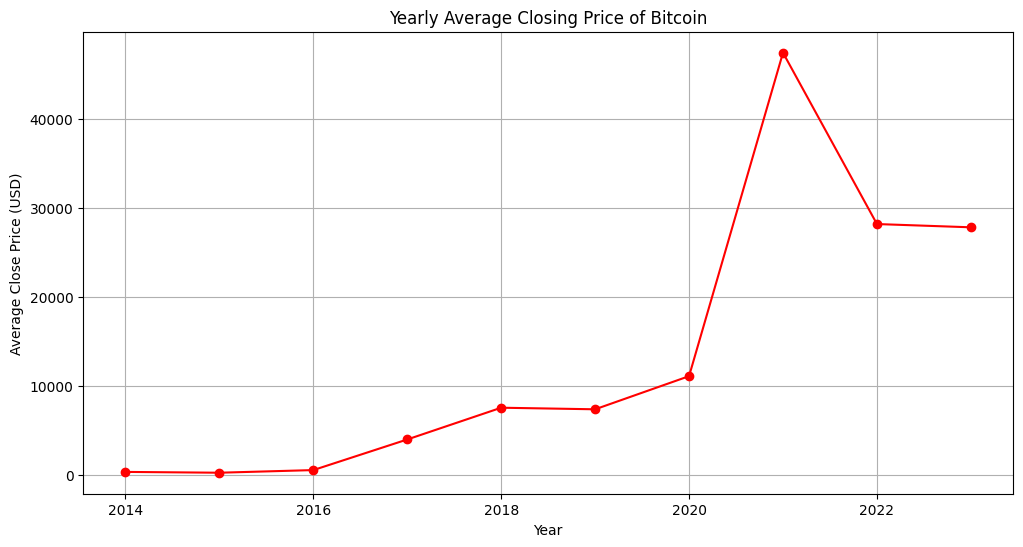

In [55]:
# Yearly Performance Comparison
btc_data['Year'] = btc_data['Date'].dt.year
yearly_avg_prices = btc_data.groupby('Year')['Close'].mean()

plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_prices.index, yearly_avg_prices, marker='o', linestyle='-', color='red')
plt.title('Yearly Average Closing Price of Bitcoin')
plt.xlabel('Year')
plt.ylabel('Average Close Price (USD)')
plt.grid(True)
plt.show()

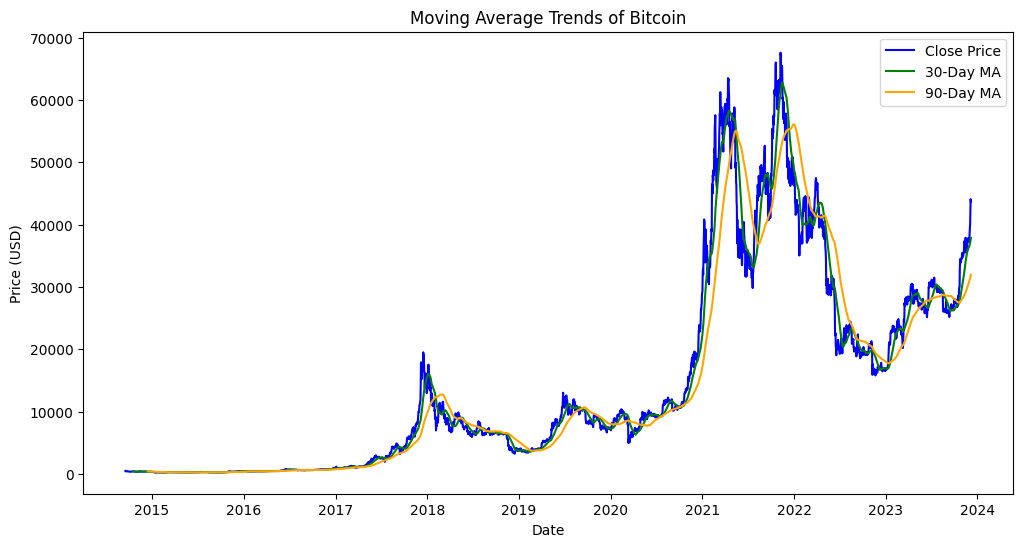

In [56]:
# Moving Average Trends
btc_data['30d MA'] = btc_data['Close'].rolling(window=30).mean()
btc_data['90d MA'] = btc_data['Close'].rolling(window=90).mean()

plt.figure(figsize=(12, 6))
plt.plot(btc_data['Date'], btc_data['Close'], label='Close Price', color='blue')
plt.plot(btc_data['Date'], btc_data['30d MA'], label='30-Day MA', color='green')
plt.plot(btc_data['Date'], btc_data['90d MA'], label='90-Day MA', color='orange')
plt.title('Moving Average Trends of Bitcoin')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

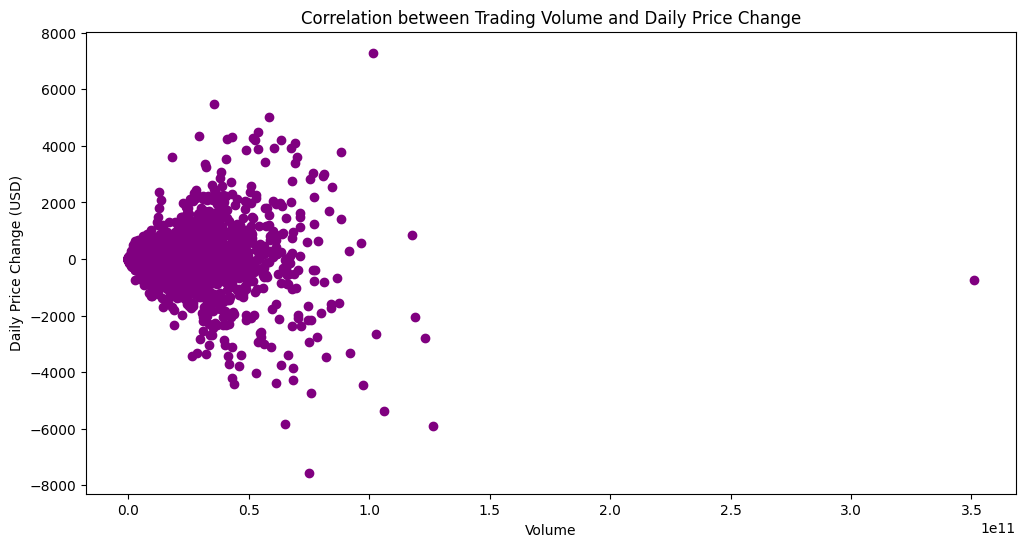

In [57]:
# Volume-Price Correlation
btc_data['Daily Price Change'] = btc_data['Close'].diff()

plt.figure(figsize=(12, 6))
plt.scatter(btc_data['Volume'], btc_data['Daily Price Change'], color='purple')
plt.title('Correlation between Trading Volume and Daily Price Change')
plt.xlabel('Volume')
plt.ylabel('Daily Price Change (USD)')
plt.show()

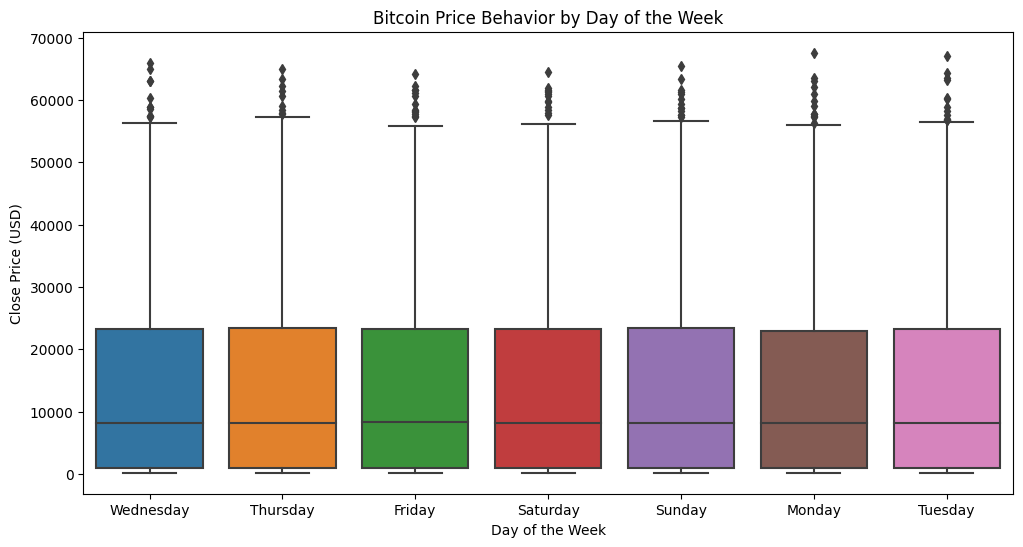

In [58]:
# Day of Week Analysis
btc_data['Day of Week'] = btc_data['Date'].dt.day_name()
plt.figure(figsize=(12, 6))
sns.boxplot(x='Day of Week', y='Close', data=btc_data)
plt.title('Bitcoin Price Behavior by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Close Price (USD)')
plt.show()

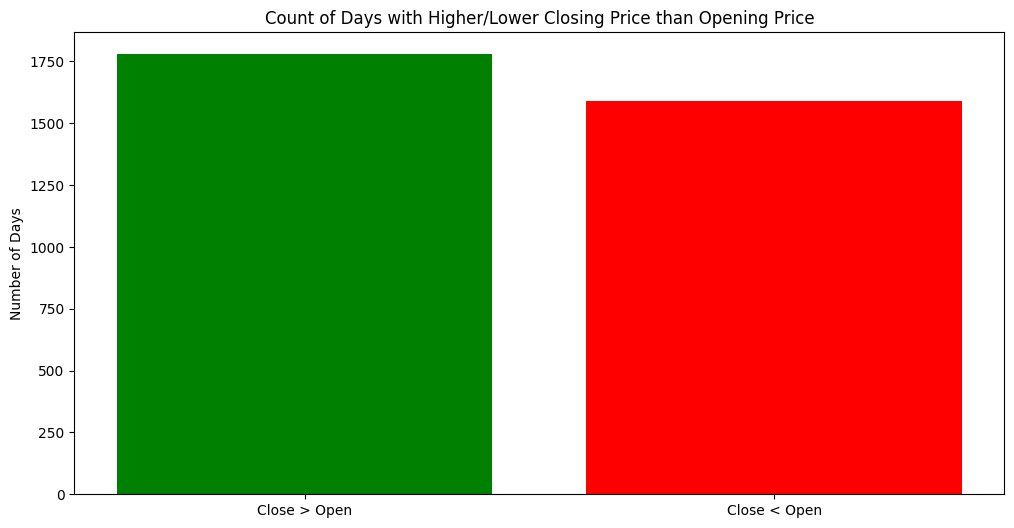

In [59]:
# Opening vs. Closing Price
days_higher_close = (btc_data['Close'] > btc_data['Open']).sum()
days_lower_close = (btc_data['Close'] < btc_data['Open']).sum()

plt.figure(figsize=(12, 6))
plt.bar(['Close > Open', 'Close < Open'], [days_higher_close, days_lower_close], color=['green', 'red'])
plt.title('Count of Days with Higher/Lower Closing Price than Opening Price')
plt.ylabel('Number of Days')
plt.show()

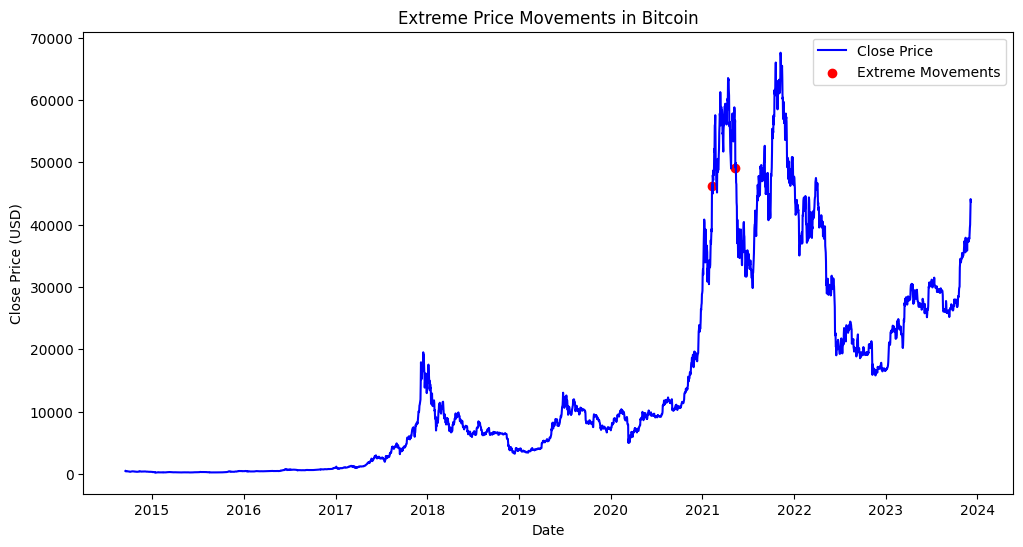

In [60]:
# Extreme Price Movements
btc_data['Daily Change'] = btc_data['Close'] - btc_data['Open']
extreme_movements = btc_data[(btc_data['Daily Change'] == btc_data['Daily Change'].max()) |
                             (btc_data['Daily Change'] == btc_data['Daily Change'].min())]

plt.figure(figsize=(12, 6))
plt.plot(btc_data['Date'], btc_data['Close'], label='Close Price', color='blue')
plt.scatter(extreme_movements['Date'], extreme_movements['Close'], color='red', label='Extreme Movements')
plt.title('Extreme Price Movements in Bitcoin')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

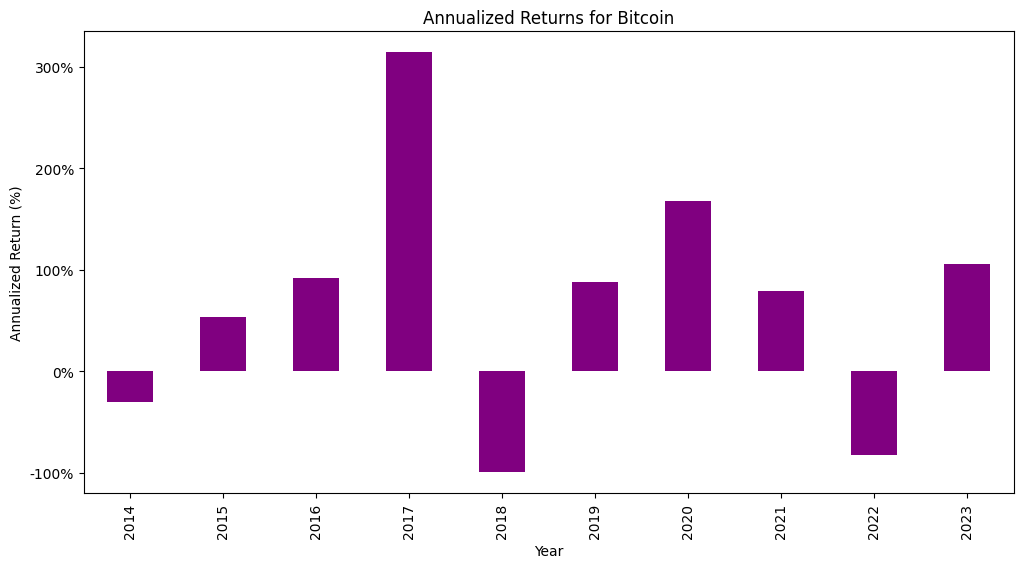

In [61]:
from matplotlib.ticker import FuncFormatter

# Annualized Returns
btc_data['Yearly Return'] = btc_data['Close'].pct_change().groupby(btc_data['Year']).cumsum() * 100
annualized_returns = btc_data.groupby('Year')['Yearly Return'].last()

plt.figure(figsize=(12, 6))
annualized_returns.plot(kind='bar', color='purple')
plt.title('Annualized Returns for Bitcoin')
plt.xlabel('Year')
plt.ylabel('Annualized Return (%)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0f}%'.format(y)))
plt.show()

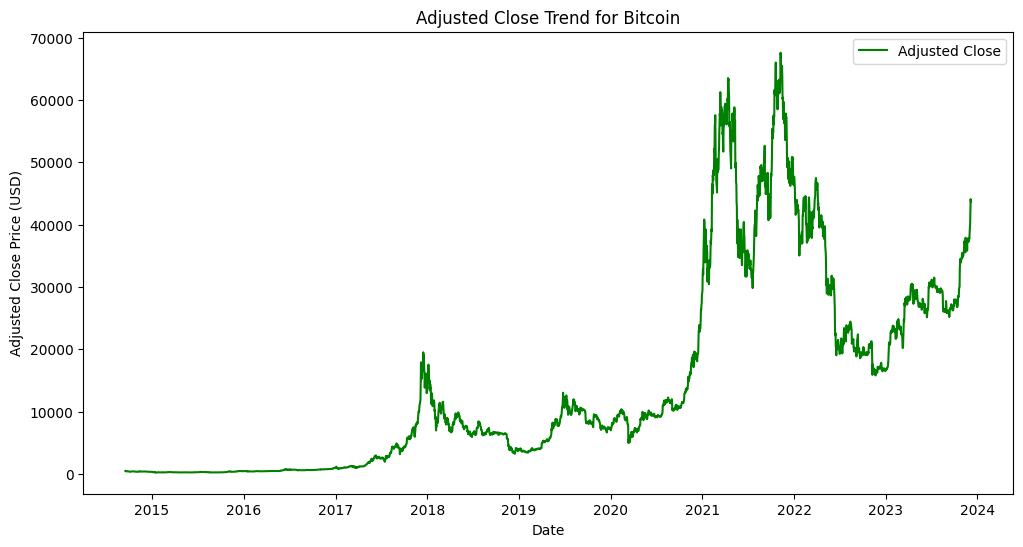

In [62]:
# Adjusted Close Trend
plt.figure(figsize=(12, 6))
plt.plot(btc_data['Date'], btc_data['Adj Close'], label='Adjusted Close', color='green')
plt.title('Adjusted Close Trend for Bitcoin')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend()
plt.show()

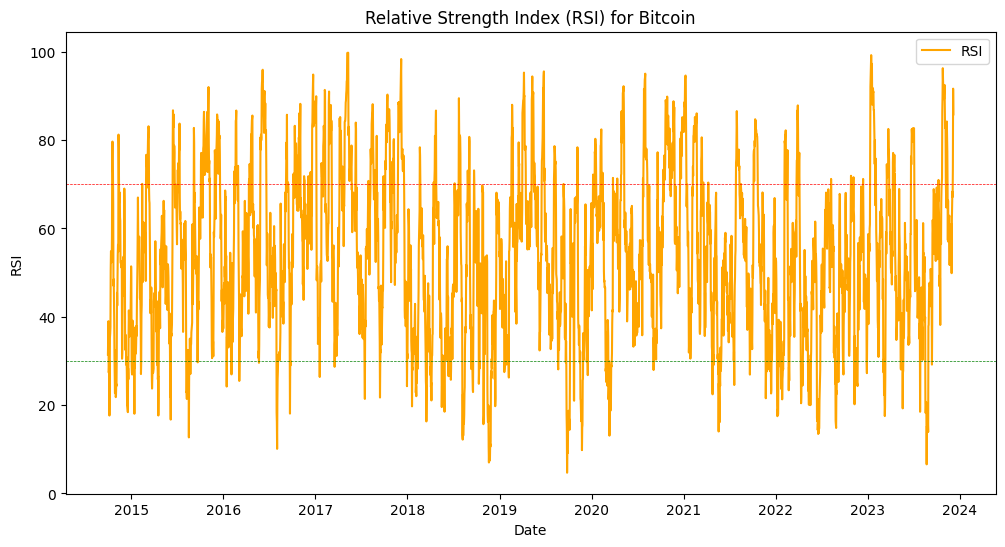

In [63]:
# Relative Strength Index (RSI)
window_length = 14
delta = btc_data['Close'].diff()
up = delta.clip(lower=0)
down = -1 * delta.clip(upper=0)
roll_up = up.rolling(window_length).mean()
roll_down = down.rolling(window_length).mean()
RS = roll_up / roll_down
btc_data['RSI'] = 100.0 - (100.0 / (1.0 + RS))

plt.figure(figsize=(12, 6))
plt.plot(btc_data['Date'], btc_data['RSI'], label='RSI', color='orange')
plt.title('Relative Strength Index (RSI) for Bitcoin')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.axhline(70, color='red', linestyle='dashed', linewidth=0.5)
plt.axhline(30, color='green', linestyle='dashed', linewidth=0.5)
plt.legend()
plt.show()

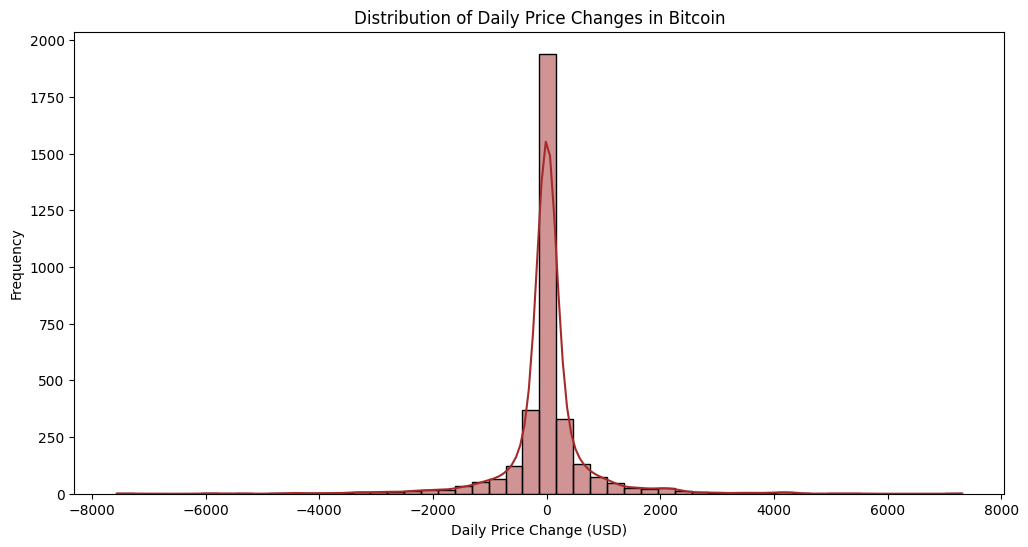

In [64]:
# Price Change Distribution
plt.figure(figsize=(12, 6))
sns.histplot(btc_data['Daily Change'], bins=50, kde=True, color='brown')
plt.title('Distribution of Daily Price Changes in Bitcoin')
plt.xlabel('Daily Price Change (USD)')
plt.ylabel('Frequency')
plt.show()

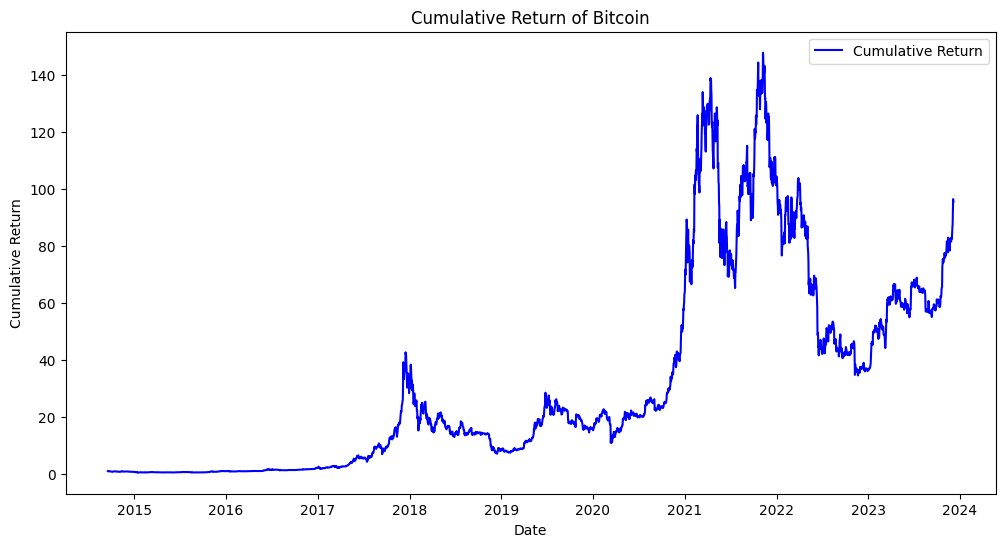

In [65]:
# Cumulative Returns
btc_data['Cumulative Return'] = (btc_data['Close'].pct_change() + 1).cumprod()
plt.figure(figsize=(12, 6))
plt.plot(btc_data['Date'], btc_data['Cumulative Return'], label='Cumulative Return', color='blue')
plt.title('Cumulative Return of Bitcoin')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

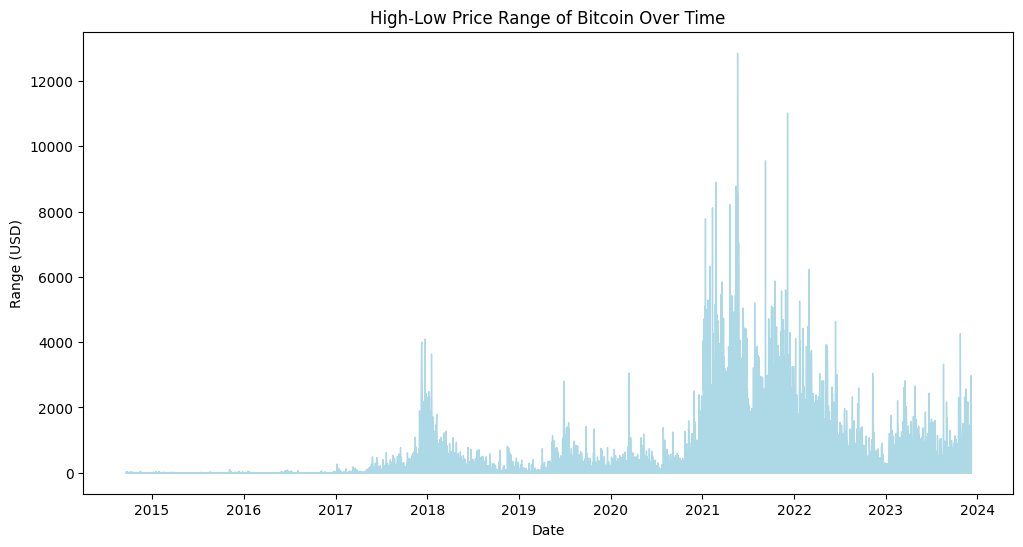

In [66]:
# High-Low Range Over Time
btc_data['High-Low Range'] = btc_data['High'] - btc_data['Low']
plt.figure(figsize=(12, 6))
plt.fill_between(btc_data['Date'], btc_data['High-Low Range'], color='lightblue')
plt.title('High-Low Price Range of Bitcoin Over Time')
plt.xlabel('Date')
plt.ylabel('Range (USD)')
plt.show()

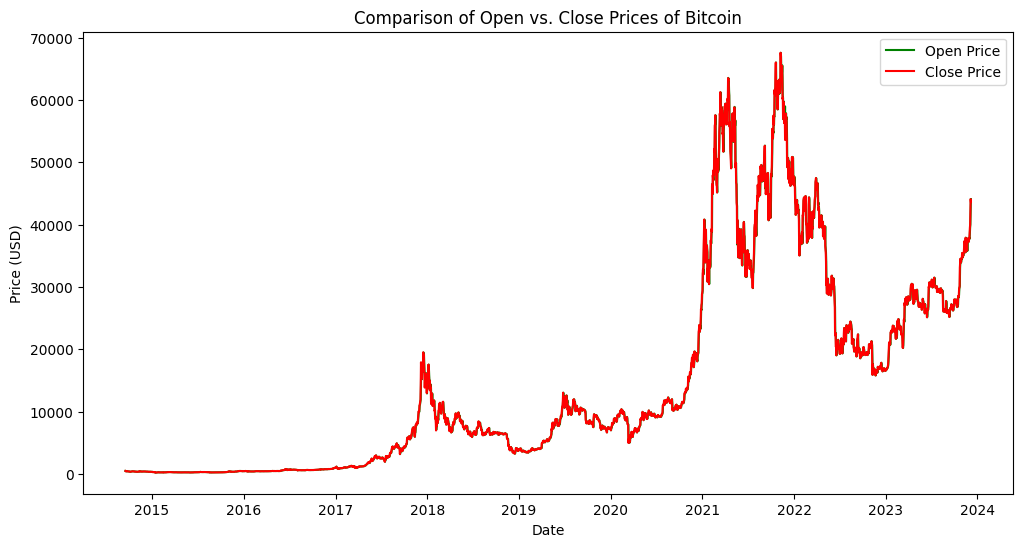

In [67]:
# Comparison of Open vs. Close
plt.figure(figsize=(12, 6))
plt.plot(btc_data['Date'], btc_data['Open'], label='Open Price', color='green')
plt.plot(btc_data['Date'], btc_data['Close'], label='Close Price', color='red')
plt.title('Comparison of Open vs. Close Prices of Bitcoin')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

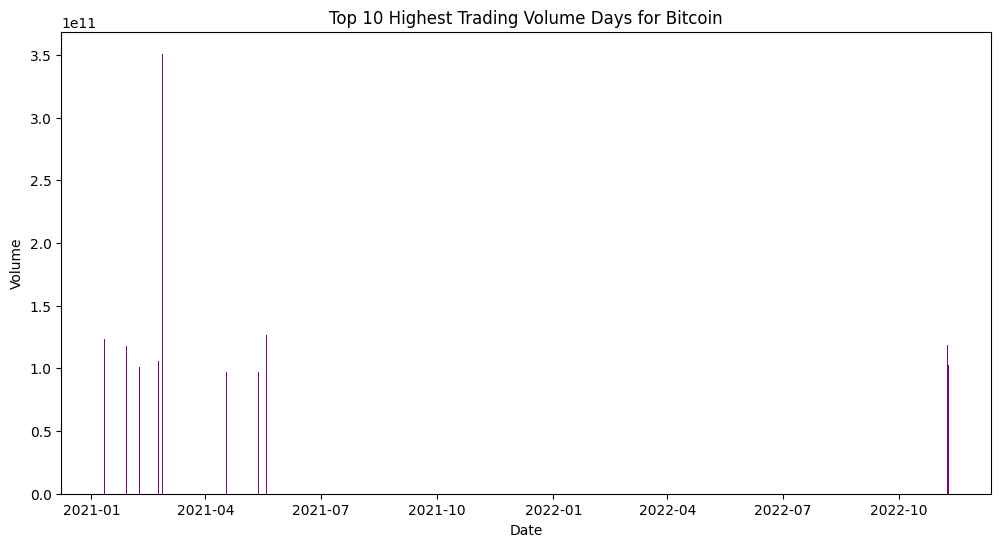

In [68]:
# Volume Peaks
top_volume_days = btc_data.nlargest(10, 'Volume')
plt.figure(figsize=(12, 6))
plt.bar(top_volume_days['Date'], top_volume_days['Volume'], color='purple')
plt.title('Top 10 Highest Trading Volume Days for Bitcoin')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

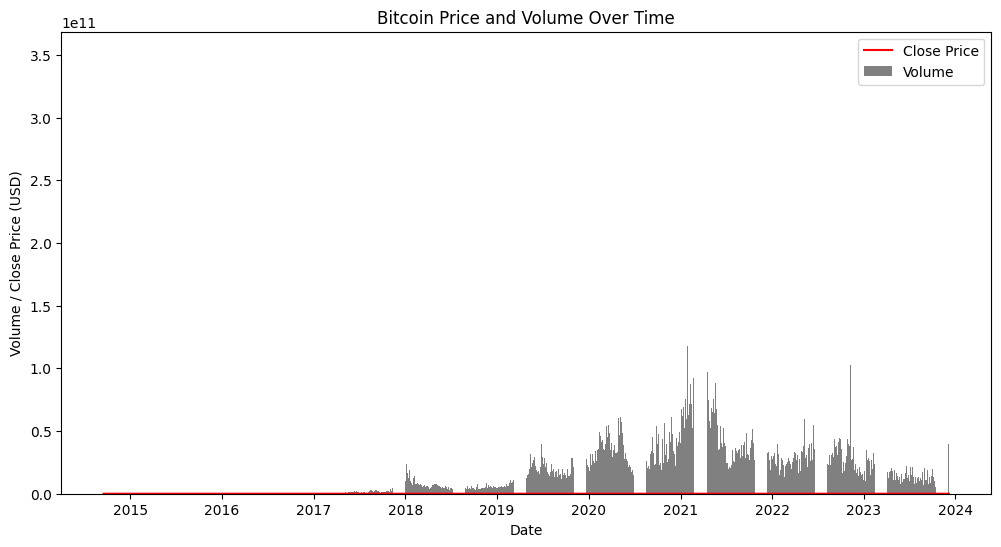

In [69]:
plt.figure(figsize=(12, 6))
plt.bar(btc_data['Date'], btc_data['Volume'], color='grey', label='Volume')
plt.plot(btc_data['Date'], btc_data['Close'], label='Close Price', color='red')
plt.title('Bitcoin Price and Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume / Close Price (USD)')
plt.legend()
plt.show()

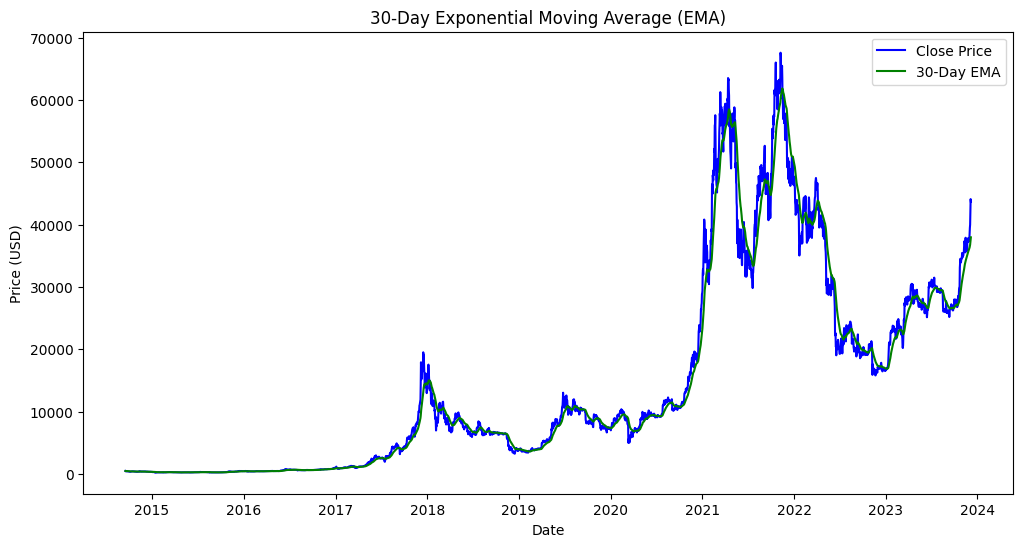

In [70]:
# EMA (Exponential Moving Average)
btc_data['30d EMA'] = btc_data['Close'].ewm(span=30, adjust=False).mean()

plt.figure(figsize=(12, 6))
plt.plot(btc_data['Date'], btc_data['Close'], label='Close Price', color='blue')
plt.plot(btc_data['Date'], btc_data['30d EMA'], label='30-Day EMA', color='green')
plt.title('30-Day Exponential Moving Average (EMA)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

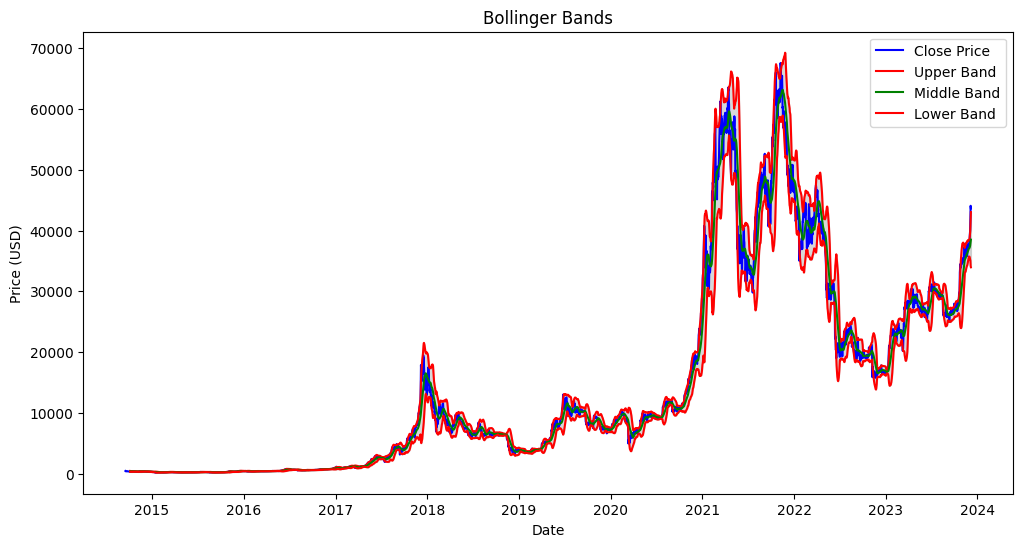

In [71]:
# Bollinger Bands
btc_data['Middle Band'] = btc_data['Close'].rolling(window=20).mean()
btc_data['Upper Band'] = btc_data['Middle Band'] + 2 * btc_data['Close'].rolling(window=20).std()
btc_data['Lower Band'] = btc_data['Middle Band'] - 2 * btc_data['Close'].rolling(window=20).std()

plt.figure(figsize=(12, 6))
plt.plot(btc_data['Date'], btc_data['Close'], label='Close Price', color='blue')
plt.plot(btc_data['Date'], btc_data['Upper Band'], label='Upper Band', color='red')
plt.plot(btc_data['Date'], btc_data['Middle Band'], label='Middle Band', color='green')
plt.plot(btc_data['Date'], btc_data['Lower Band'], label='Lower Band', color='red')
plt.fill_between(btc_data['Date'], btc_data['Upper Band'], btc_data['Lower Band'], color='grey', alpha=0.3)
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

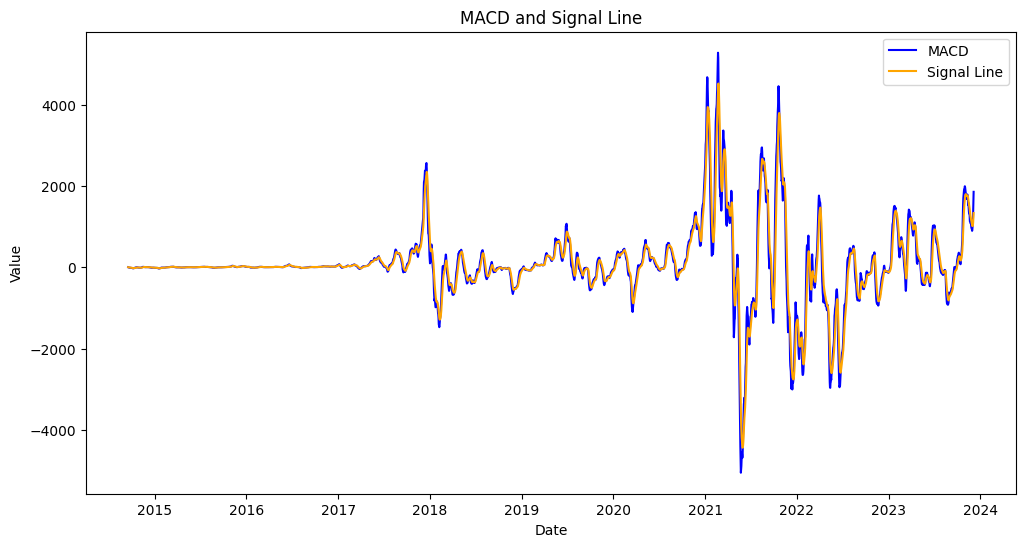

In [72]:
# MACD (Moving Average Convergence Divergence)
btc_data['MACD'] = btc_data['Close'].ewm(span=12, adjust=False).mean() - btc_data['Close'].ewm(span=26, adjust=False).mean()
btc_data['Signal Line'] = btc_data['MACD'].ewm(span=9, adjust=False).mean()

plt.figure(figsize=(12, 6))
plt.plot(btc_data['Date'], btc_data['MACD'], label='MACD', color='blue')
plt.plot(btc_data['Date'], btc_data['Signal Line'], label='Signal Line', color='orange')
plt.title('MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

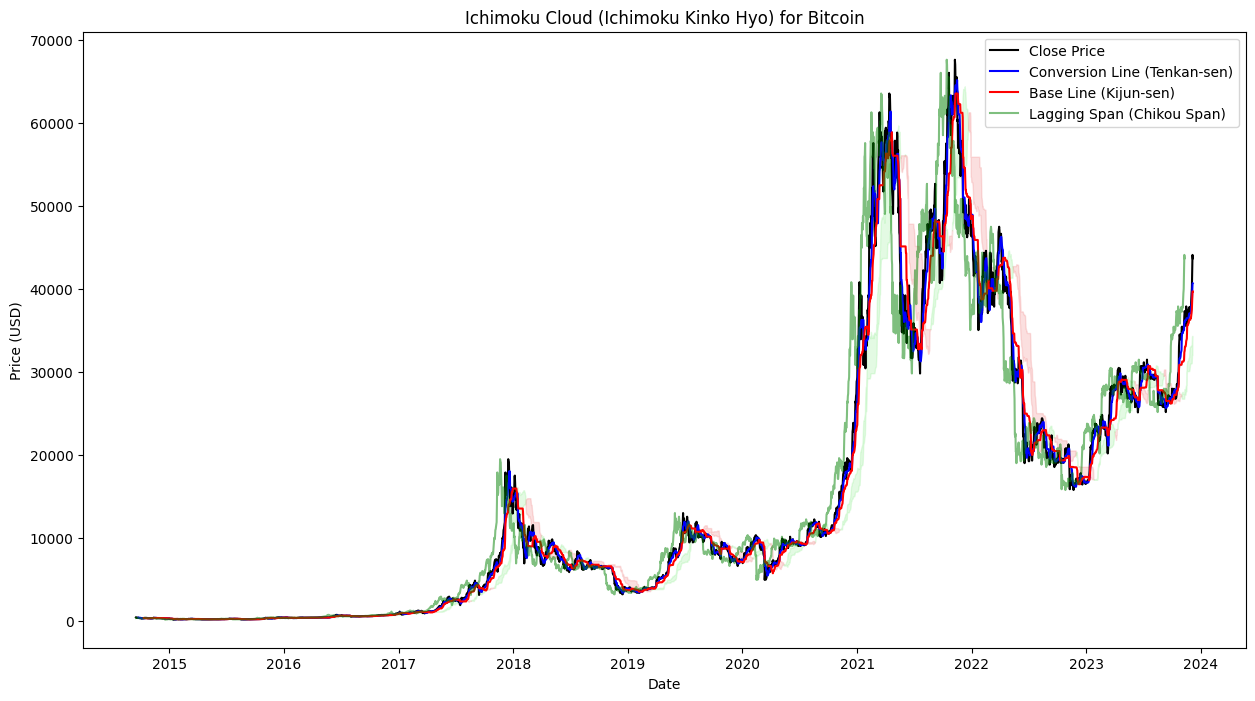

In [73]:
# Calculating the Ichimoku Cloud components
# Conversion Line (Tenkan-sen)
high_9 = btc_data['High'].rolling(window=9).max()
low_9 = btc_data['Low'].rolling(window=9).min()
btc_data['Conversion Line'] = (high_9 + low_9) / 2

# Base Line (Kijun-sen)
high_26 = btc_data['High'].rolling(window=26).max()
low_26 = btc_data['Low'].rolling(window=26).min()
btc_data['Base Line'] = (high_26 + low_26) / 2

# Leading Span A (Senkou Span A)
btc_data['Leading Span A'] = (btc_data['Conversion Line'] + btc_data['Base Line']) / 2

# Leading Span B (Senkou Span B)
high_52 = btc_data['High'].rolling(window=52).max()
low_52 = btc_data['Low'].rolling(window=52).min()
btc_data['Leading Span B'] = (high_52 + low_52) / 2

# The cloud (Kumo) is between Leading Span A and B
# Shifting Senkou Span A and B by 26 periods to the right
btc_data['Leading Span A'] = btc_data['Leading Span A'].shift(26)
btc_data['Leading Span B'] = btc_data['Leading Span B'].shift(26)

# Lagging Span (Chikou Span) - shifted 26 periods to the left
btc_data['Lagging Span'] = btc_data['Close'].shift(-26)

# Plotting the Ichimoku Cloud
plt.figure(figsize=(15, 8))
plt.plot(btc_data['Date'], btc_data['Close'], label='Close Price', color='black')
plt.plot(btc_data['Date'], btc_data['Conversion Line'], label='Conversion Line (Tenkan-sen)', color='blue')
plt.plot(btc_data['Date'], btc_data['Base Line'], label='Base Line (Kijun-sen)', color='red')
plt.fill_between(btc_data['Date'], btc_data['Leading Span A'], btc_data['Leading Span B'], where=btc_data['Leading Span A'] >= btc_data['Leading Span B'], color='lightgreen', interpolate=True, alpha=0.25)
plt.fill_between(btc_data['Date'], btc_data['Leading Span A'], btc_data['Leading Span B'], where=btc_data['Leading Span A'] < btc_data['Leading Span B'], color='lightcoral', interpolate=True, alpha=0.25)
plt.plot(btc_data['Date'], btc_data['Lagging Span'], label='Lagging Span (Chikou Span)', color='green', alpha=0.5)
plt.title('Ichimoku Cloud (Ichimoku Kinko Hyo) for Bitcoin')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

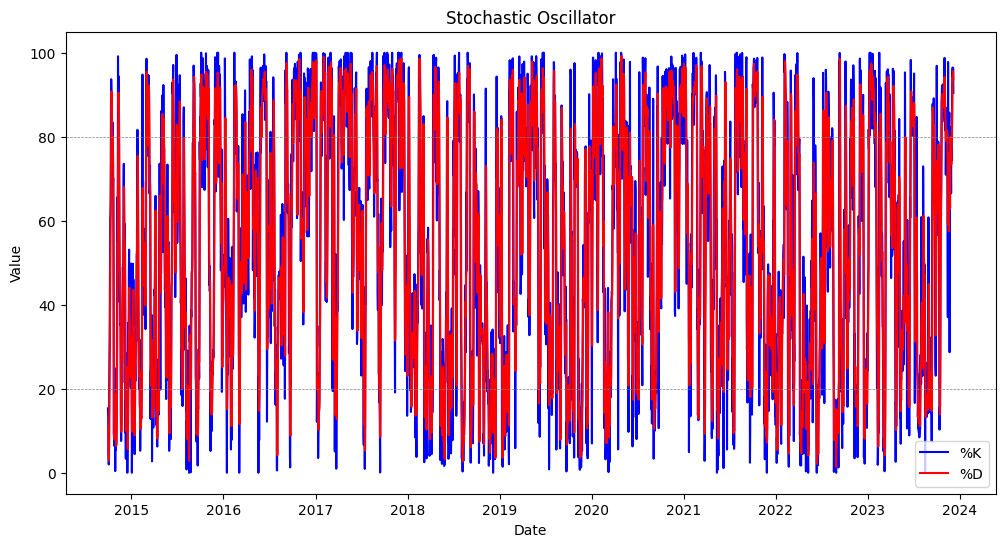

In [74]:
# Stochastic Oscillator
low_14 = btc_data['Low'].rolling(window=14).min()
high_14 = btc_data['High'].rolling(window=14).max()
btc_data['%K'] = 100 * ((btc_data['Close'] - low_14) / (high_14 - low_14))
btc_data['%D'] = btc_data['%K'].rolling(window=3).mean()

plt.figure(figsize=(12, 6))
plt.plot(btc_data['Date'], btc_data['%K'], label='%K', color='blue')
plt.plot(btc_data['Date'], btc_data['%D'], label='%D', color='red')
plt.title('Stochastic Oscillator')
plt.xlabel('Date')
plt.ylabel('Value')
plt.axhline(80, color='grey', linestyle='dashed', linewidth=0.5)
plt.axhline(20, color='grey', linestyle='dashed', linewidth=0.5)
plt.legend()
plt.show()

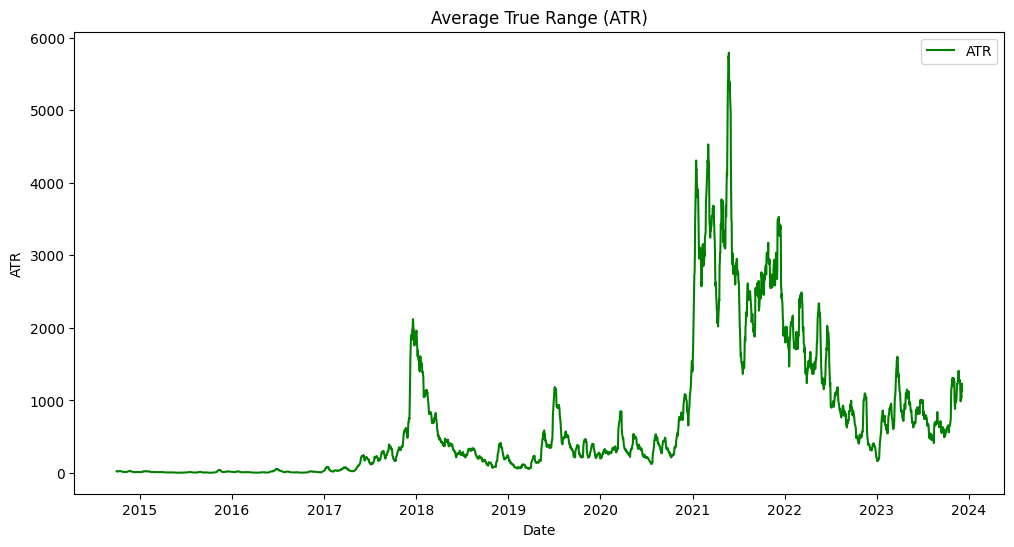

In [75]:
# Average True Range (ATR)
btc_data['TR'] = np.maximum((btc_data['High'] - btc_data['Low']),
                            np.maximum(abs(btc_data['High'] - btc_data['Close'].shift(1)),
                                       abs(btc_data['Low'] - btc_data['Close'].shift(1))))
btc_data['ATR'] = btc_data['TR'].rolling(window=14).mean()

plt.figure(figsize=(12, 6))
plt.plot(btc_data['Date'], btc_data['ATR'], label='ATR', color='green')
plt.title('Average True Range (ATR)')
plt.xlabel('Date')
plt.ylabel('ATR')
plt.legend()
plt.show()

In [76]:
btc_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price Range,Month,Year,...,Signal Line,Conversion Line,Base Line,Leading Span A,Leading Span B,Lagging Span,%K,%D,TR,ATR
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,15.752014,2014-09,2014,...,0.000000,NaN,NaN,NaN,NaN,390.414001,NaN,NaN,NaN,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,43.755981,2014-09,2014,...,-0.524805,NaN,NaN,NaN,NaN,400.869995,NaN,NaN,44.230011,NaN
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,43.302978,2014-09,2014,...,-1.822793,NaN,NaN,NaN,NaN,394.773010,NaN,NaN,43.302978,NaN
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,33.412994,2014-09,2014,...,-3.308115,NaN,NaN,NaN,NaN,382.556000,NaN,NaN,33.412994,NaN
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,19.244995,2014-09,2014,...,-4.986319,NaN,NaN,NaN,NaN,383.757996,NaN,NaN,19.244995,NaN


In [78]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3253 entries, 2014-12-15 to 2023-11-10
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype    
---  ------              --------------  -----    
 0   Open                3253 non-null   float64  
 1   High                3253 non-null   float64  
 2   Low                 3253 non-null   float64  
 3   Close               3253 non-null   float64  
 4   Adj Close           3253 non-null   float64  
 5   Volume              3253 non-null   int64    
 6   Price Range         3253 non-null   float64  
 7   Month               3253 non-null   period[M]
 8   Year                3253 non-null   int64    
 9   30d MA              3253 non-null   float64  
 10  90d MA              3253 non-null   float64  
 11  Daily Price Change  3253 non-null   float64  
 12  Day of Week         3253 non-null   object   
 13  Daily Change        3253 non-null   float64  
 14  Yearly Return       3253 non-null   float64  
 15  RSI

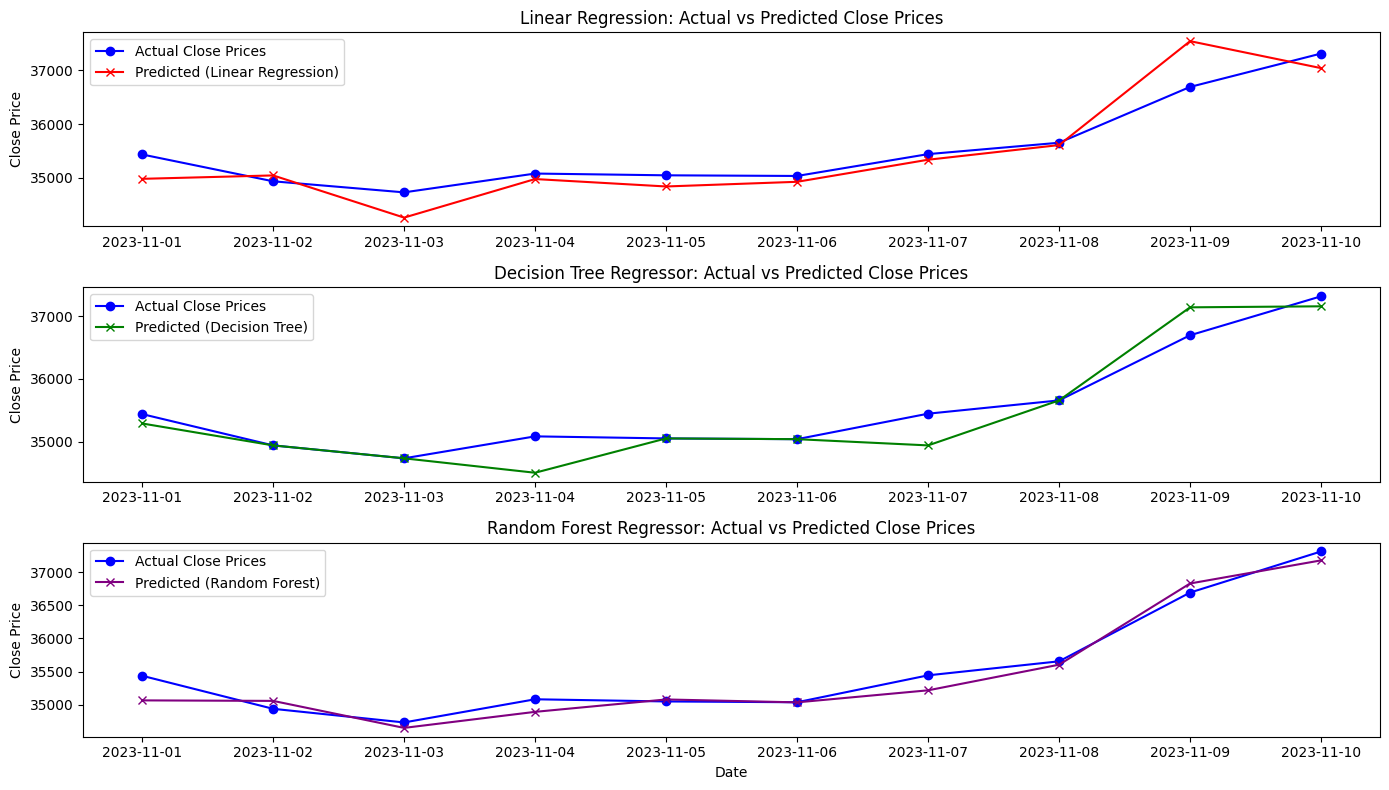

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Selecting independent and dependent variables
X = btc_data[['Open', 'High', 'Low', 'Volume']]
y = btc_data['Close']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear Regression Model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Decision Tree Regressor Model
tree_model = DecisionTreeRegressor(random_state=0)
tree_model.fit(X_train, y_train)

# Random Forest Regressor Model
forest_model = RandomForestRegressor(random_state=0)
forest_model.fit(X_train, y_train)

# Predicting the last 10 days for each model
last_10_days = X[-10:]
actual_close_prices = y[-10:]
predicted_close_lin = lin_model.predict(last_10_days)
predicted_close_tree = tree_model.predict(last_10_days)
predicted_close_forest = forest_model.predict(last_10_days)

# Generating dates for the last 10 days from the dataset for plotting
dates = pd.to_datetime(btc_data.index)[-10:]

# Plotting the actual vs predicted prices for each model
plt.figure(figsize=(14, 8))

# Linear Regression
plt.subplot(3, 1, 1)
plt.plot(dates, actual_close_prices, label='Actual Close Prices', color='blue', marker='o')
plt.plot(dates, predicted_close_lin, label='Predicted (Linear Regression)', color='red', marker='x')
plt.title('Linear Regression: Actual vs Predicted Close Prices')
plt.ylabel('Close Price')
plt.legend()

# Decision Tree Regressor
plt.subplot(3, 1, 2)
plt.plot(dates, actual_close_prices, label='Actual Close Prices', color='blue', marker='o')
plt.plot(dates, predicted_close_tree, label='Predicted (Decision Tree)', color='green', marker='x')
plt.title('Decision Tree Regressor: Actual vs Predicted Close Prices')
plt.ylabel('Close Price')
plt.legend()

# Random Forest Regressor
plt.subplot(3, 1, 3)
plt.plot(dates, actual_close_prices, label='Actual Close Prices', color='blue', marker='o')
plt.plot(dates, predicted_close_forest, label='Predicted (Random Forest)', color='purple', marker='x')
plt.title('Random Forest Regressor: Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

plt.tight_layout()
plt.show()


In [85]:
lin_y_pred = lin_model.predict(X_test)
tree_y_pred = tree_model.predict(X_test)
forest_y_pred = forest_model.predict(X_test)

print("Linear Regression:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, lin_y_pred)}")
print(f"R-squared Value (R2): {r2_score(y_test, lin_y_pred)}\n")

print("Decision Tree Regressor:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, tree_y_pred)}")
print(f"R-squared Value (R2): {r2_score(y_test, tree_y_pred)}\n")

print("Random Forest Regressor:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, forest_y_pred)}")
print(f"R-squared Value (R2): {r2_score(y_test, forest_y_pred)}\n")

Linear Regression:
Mean Squared Error (MSE): 102832.2216812326
R-squared Value (R2): 0.9996065312166414

Decision Tree Regressor:
Mean Squared Error (MSE): 280772.6357609804
R-squared Value (R2): 0.9989256746028914

Random Forest Regressor:
Mean Squared Error (MSE): 178947.48902147345
R-squared Value (R2): 0.999315289997248



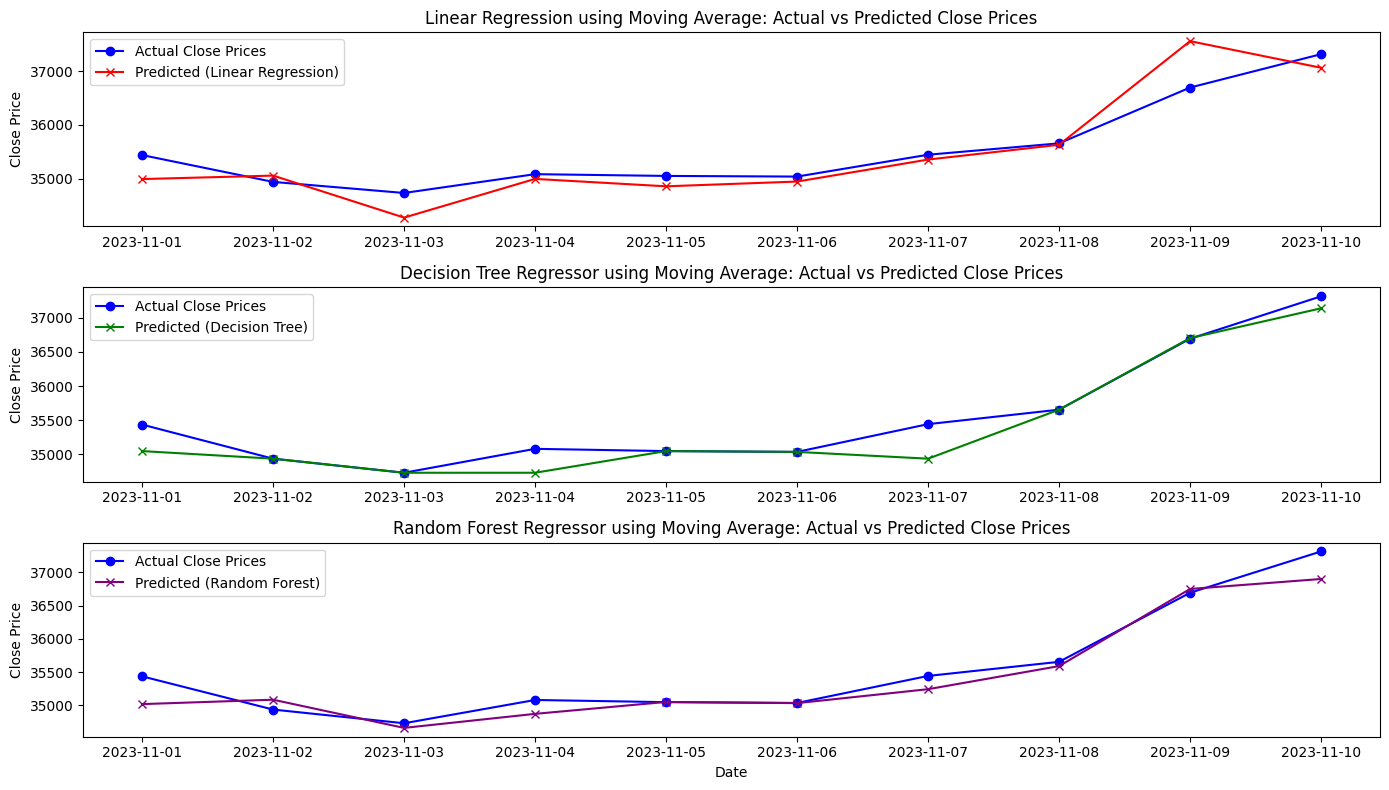

In [91]:
# Selecting independent and dependent variables
X = btc_data[['Open', 'High', 'Low', 'Volume', '30d MA', '90d MA']]
y = btc_data['Close']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear Regression Model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Decision Tree Regressor Model
tree_model = DecisionTreeRegressor(random_state=0)
tree_model.fit(X_train, y_train)

# Random Forest Regressor Model
forest_model = RandomForestRegressor(random_state=0)
forest_model.fit(X_train, y_train)

# Predicting the last 10 days for each model
last_10_days = X[-10:]
actual_close_prices = y[-10:]
predicted_close_lin = lin_model.predict(last_10_days)
predicted_close_tree = tree_model.predict(last_10_days)
predicted_close_forest = forest_model.predict(last_10_days)

# Generating dates for the last 10 days from the dataset for plotting
dates = pd.to_datetime(btc_data.index)[-10:]

# Plotting the actual vs predicted prices for each model
plt.figure(figsize=(14, 8))

# Linear Regression
plt.subplot(3, 1, 1)
plt.plot(dates, actual_close_prices, label='Actual Close Prices', color='blue', marker='o')
plt.plot(dates, predicted_close_lin, label='Predicted (Linear Regression)', color='red', marker='x')
plt.title('Linear Regression using Moving Average: Actual vs Predicted Close Prices')
plt.ylabel('Close Price')
plt.legend()

# Decision Tree Regressor
plt.subplot(3, 1, 2)
plt.plot(dates, actual_close_prices, label='Actual Close Prices', color='blue', marker='o')
plt.plot(dates, predicted_close_tree, label='Predicted (Decision Tree)', color='green', marker='x')
plt.title('Decision Tree Regressor using Moving Average: Actual vs Predicted Close Prices')
plt.ylabel('Close Price')
plt.legend()

# Random Forest Regressor
plt.subplot(3, 1, 3)
plt.plot(dates, actual_close_prices, label='Actual Close Prices', color='blue', marker='o')
plt.plot(dates, predicted_close_forest, label='Predicted (Random Forest)', color='purple', marker='x')
plt.title('Random Forest Regressor using Moving Average: Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

plt.tight_layout()
plt.show()


In [92]:
lin_y_pred = lin_model.predict(X_test)
tree_y_pred = tree_model.predict(X_test)
forest_y_pred = forest_model.predict(X_test)

print("Linear Regression using Moving Average:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, lin_y_pred)}")
print(f"R-squared Value (R2): {r2_score(y_test, lin_y_pred)}\n")

print("Decision Tree Regressor using Moving Average:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, tree_y_pred)}")
print(f"R-squared Value (R2): {r2_score(y_test, tree_y_pred)}\n")

print("Random Forest Regressor using Moving Average:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, forest_y_pred)}")
print(f"R-squared Value (R2): {r2_score(y_test, forest_y_pred)}\n")

Linear Regression using Moving Average:
Mean Squared Error (MSE): 103963.95016758172
R-squared Value (R2): 0.9996022008635348

Decision Tree Regressor using Moving Average:
Mean Squared Error (MSE): 289601.1355558959
R-squared Value (R2): 0.9988918939549933

Random Forest Regressor using Moving Average:
Mean Squared Error (MSE): 183417.75107605848
R-squared Value (R2): 0.9992981853529725

